In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

%matplotlib inline

In [2]:
train = pd.read_json("train.json")
train.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


In [3]:
test = pd.read_json("test.json")
test.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,Large with awesome terrace--accessible via bed...,Suffolk Street,"[Elevator, Laundry in Building, Laundry in Uni...",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,[https://photos.renthop.com/2/7142618_1c45a2c8...,2950,99 Suffolk Street
1,1.0,2,0,2016-06-24 06:36:34,Prime Soho - between Bleecker and Houston - Ne...,Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7278,7210040,-74.0000,d0b5648017832b2427eeb9956d966a14,[https://photos.renthop.com/2/7210040_d824cc71...,2850,176 Thompson Street
100,1.0,1,3dbbb69fd52e0d25131aa1cd459c87eb,2016-06-03 04:29:40,New York chic has reached a new level ...,101 East 10th Street,"[Doorman, Elevator, No Fee]",40.7306,7103890,-73.9890,9ca6f3baa475c37a3b3521a394d65467,[https://photos.renthop.com/2/7103890_85b33077...,3758,101 East 10th Street
1000,1.0,2,783d21d013a7e655bddc4ed0d461cc5e,2016-06-11 06:17:35,Step into this fantastic new Construction in t...,South Third Street\r,"[Roof Deck, Balcony, Elevator, Laundry in Buil...",40.7109,7143442,-73.9571,0b9d5db96db8472d7aeb67c67338c4d2,[https://photos.renthop.com/2/7143442_0879e9e0...,3300,251 South Third Street\r
100000,2.0,2,6134e7c4dd1a98d9aee36623c9872b49,2016-04-12 05:24:17,"~Take a stroll in Central Park, enjoy the ente...","Midtown West, 8th Ave","[Common Outdoor Space, Cats Allowed, Dogs Allo...",40.7650,6860601,-73.9845,b5eda0eb31b042ce2124fd9e9fcfce2f,[https://photos.renthop.com/2/6860601_c96164d8...,4900,260 West 54th Street


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 10 to 99994
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
interest_level     49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [5]:
train.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [7]:
train.isnull().sum()

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
interest_level     0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
dtype: int64

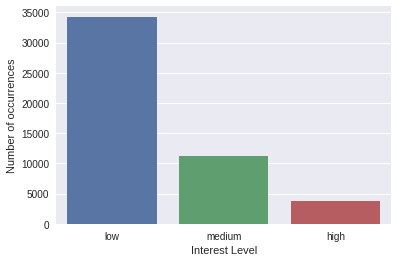

In [8]:
sns.countplot(train.interest_level, order=['low', 'medium', 'high']);
plt.xlabel('Interest Level');
plt.ylabel('Number of occurrences');

In [14]:
target_num_map = {'high':2, 'medium':1, 'low':0}
y = train["interest_level"].apply(lambda x: target_num_map[x])
y.head()

10        1
10000     0
100004    2
100007    0
100013    0
Name: interest_level, dtype: int64

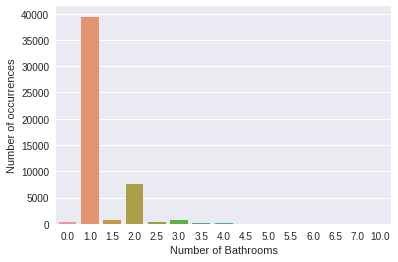

In [15]:
fig = plt.figure()
### Number of occurrences
sns.countplot(train.bathrooms);
plt.xlabel('Number of Bathrooms');
plt.ylabel('Number of occurrences');

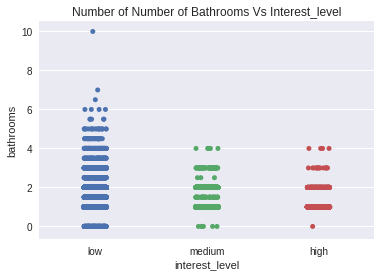

In [16]:
order = ['low', 'medium', 'high']
sns.stripplot(train["interest_level"],train["bathrooms"],jitter=True,order=order)
plt.title("Number of Number of Bathrooms Vs Interest_level");

In [17]:
#ulimit = np.percentile(train.bathrooms.values, 99.5)
ulimit = 4
train['bathrooms'].ix[train['bathrooms']>ulimit] = ulimit

/home/ly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ly/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


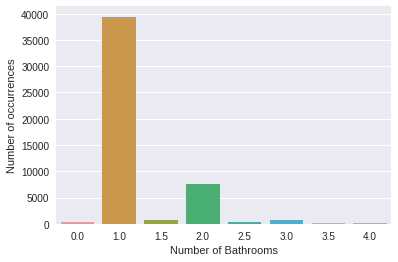

In [18]:
fig = plt.figure()
### Number of occurrences
sns.countplot(train.bathrooms);
plt.xlabel('Number of Bathrooms');
plt.ylabel('Number of occurrences');

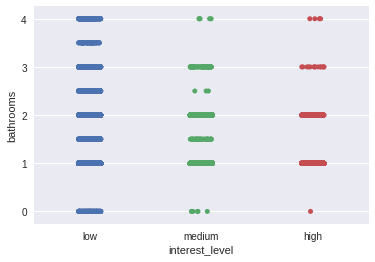

In [19]:
sns.stripplot(y="bathrooms", x="interest_level",data=train,jitter=True,order=order);

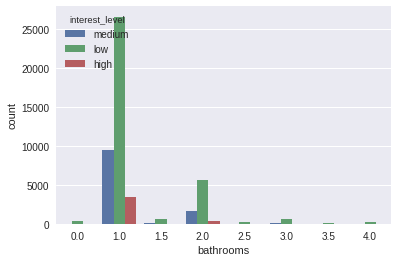

In [20]:
sns.countplot(x="bathrooms", hue="interest_level",data=train);

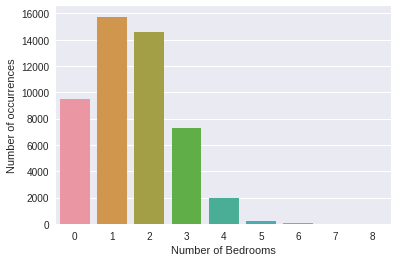

In [21]:
fig = plt.figure()
### Number of occurrences
sns.countplot(train.bedrooms);
plt.xlabel('Number of Bedrooms');
plt.ylabel('Number of occurrences');

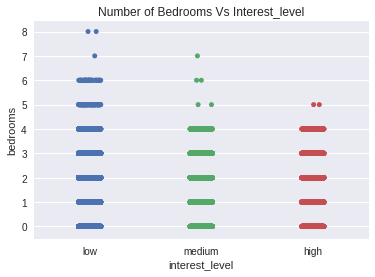

In [22]:
order = ['low', 'medium', 'high']
sns.stripplot(train["interest_level"],train["bedrooms"],jitter=True,order=order)
plt.title("Number of Bedrooms Vs Interest_level");

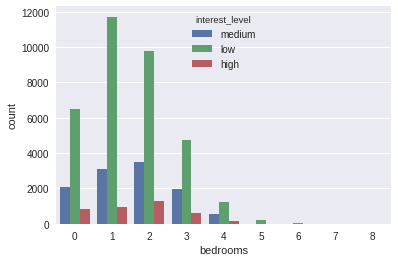

In [23]:
sns.countplot(x="bedrooms", hue="interest_level",data=train);

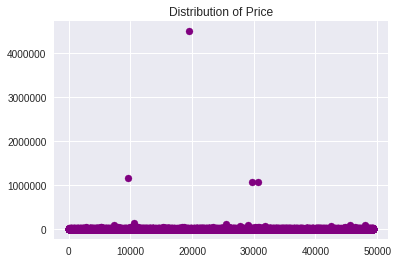

In [24]:
plt.scatter(range(train.shape[0]), train["price"].values,color='purple')
plt.title("Distribution of Price");

/home/ly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
/home/ly/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


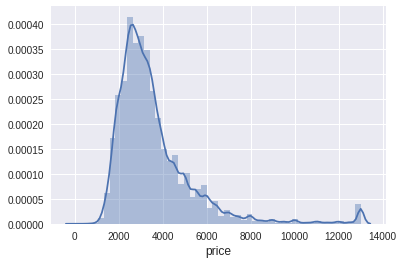

In [25]:
ulimit = np.percentile(train.price.values, 99)
train['price'].ix[train['price']>ulimit] = ulimit

sns.distplot(train.price.values, bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

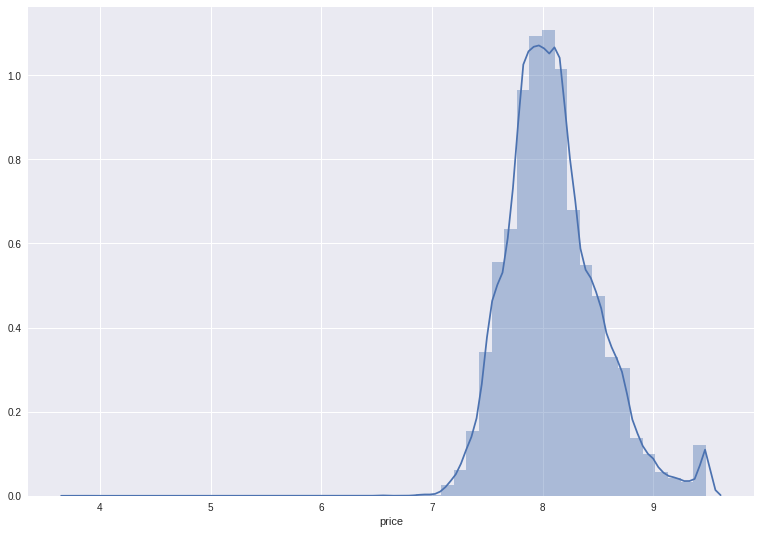

In [26]:
plt.figure(figsize=(13,9))
sns.distplot(np.log1p(train["price"]))

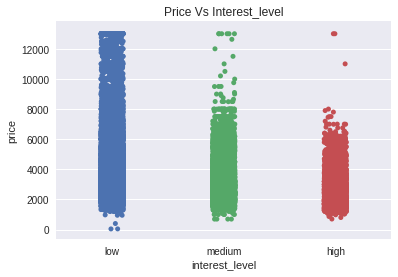

In [27]:
order = ['low', 'medium', 'high']
sns.stripplot(train["interest_level"],train["price"],jitter=True,order=order)
plt.title("Price Vs Interest_level");

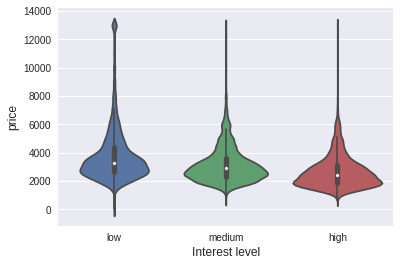

In [28]:
order = ['low', 'medium', 'high']
sns.violinplot(x='interest_level', y='price', data=train, order = order)
plt.xlabel('Interest level', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

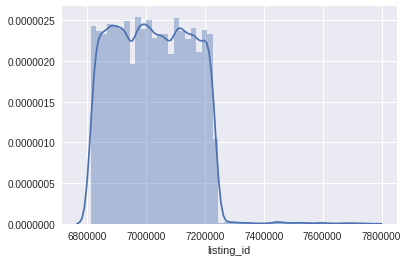

In [29]:
sns.distplot(train.listing_id.values, bins=50, kde=True)
plt.xlabel('listing_id')
plt.show()

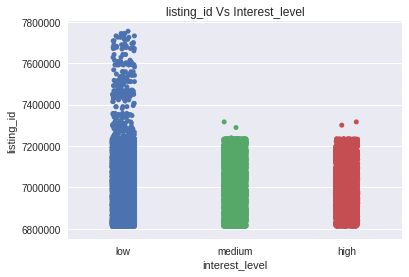

In [30]:
order = ['low', 'medium', 'high']
sns.stripplot(train["interest_level"],train["listing_id"],jitter=True,order=order)
plt.title("listing_id Vs Interest_level");

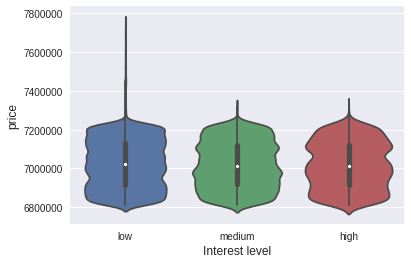

In [31]:
order = ['low', 'medium', 'high']
sns.violinplot(x='interest_level', y='listing_id', data=train, order = order)
plt.xlabel('Interest level', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

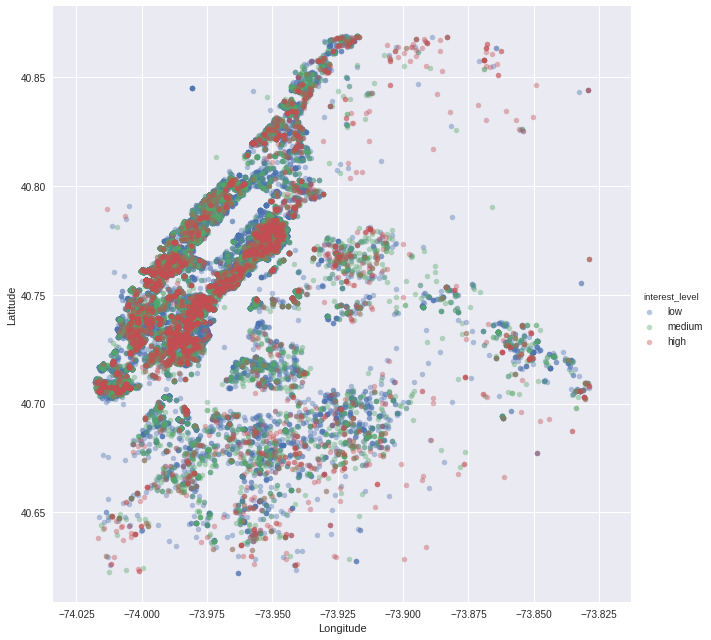

In [32]:
sns.lmplot(x="longitude", y="latitude", fit_reg=False, hue='interest_level',
           hue_order=['low', 'medium', 'high'], size=9, scatter_kws={'alpha':0.4,'s':30},
           data=train[(train.longitude>train.longitude.quantile(0.005))
                           &(train.longitude<train.longitude.quantile(0.995))
                           &(train.latitude>train.latitude.quantile(0.005))                           
                           &(train.latitude<train.latitude.quantile(0.995))]);
plt.xlabel('Longitude');
plt.ylabel('Latitude');

Display_address that appear less than 2 times: 63.22%
Display_address that appear less than 10 times: 89.6%
Display_address that appear less than 50 times: 97.73%
Display_address that appear less than 100 times: 99.26%
Display_address that appear less than 500 times: 100.0%


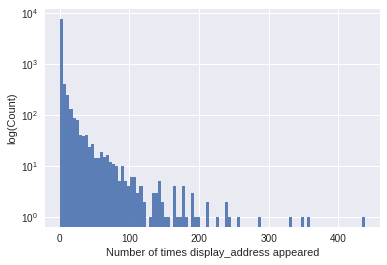

In [33]:
cnt_srs = train.groupby('display_address')['display_address'].count()

for i in [2, 10, 50, 100, 500]:
    print('Display_address that appear less than {} times: {}%'.format(i, round((cnt_srs < i).mean() * 100, 2)))

plt.figure()
plt.hist(cnt_srs.values, bins=100, log=True, alpha=0.9)
#sns.distplot(cnt_srs.values, bins=100)
plt.xlabel('Number of times display_address appeared')
plt.ylabel('log(Count)')

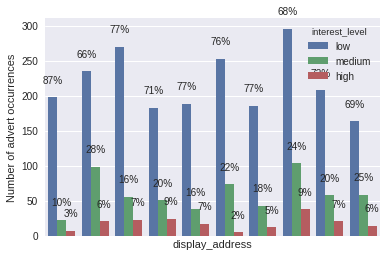

In [34]:
### Let's get a list of top 10 display address
top10da = train.display_address.value_counts().nlargest(10).index.tolist()

fig = plt.figure()
ax = sns.countplot(x="display_address", hue="interest_level",
                   data=train[train.display_address.isin(top10da)]);
plt.xlabel('display_address');
plt.ylabel('Number of advert occurrences');
### Manager_ids are too long. Let's remove them
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off');

### Adding percents over bars
height = [0 if np.isnan(p.get_height()) else p.get_height() for p in ax.patches]
ncol = int(len(height)/3)
total = [height[i] + height[i + ncol] + height[i + 2*ncol] for i in range(ncol)] * 3
for i, p in enumerate(ax.patches):    
    ax.text(p.get_x()+p.get_width()/2,
            height[i] + 20,
            '{:1.0%}'.format(height[i]/total[i]),
            ha="center")

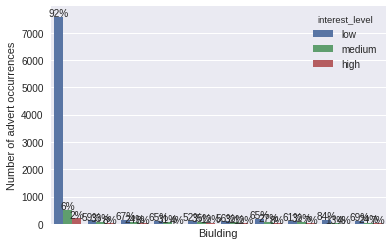

In [35]:
### Let's get a list of top 10 building id
top10building = train.building_id.value_counts().nlargest(10).index.tolist()
### ...and plot number of different Interest Level rental adverts for each of them
fig = plt.figure()
ax = sns.countplot(x="building_id", hue="interest_level",
                   data=train[train.building_id.isin(top10building)]);
plt.xlabel('Biulding');
plt.ylabel('Number of advert occurrences');
### Manager_ids are too long. Let's remove them
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off');

### Adding percents over bars
height = [0 if np.isnan(p.get_height()) else p.get_height() for p in ax.patches]
ncol = int(len(height)/3)
total = [height[i] + height[i + ncol] + height[i + 2*ncol] for i in range(ncol)] * 3
for i, p in enumerate(ax.patches):    
    ax.text(p.get_x()+p.get_width()/2,
            height[i] + 20,
            '{:1.0%}'.format(height[i]/total[i]),
            ha="center")

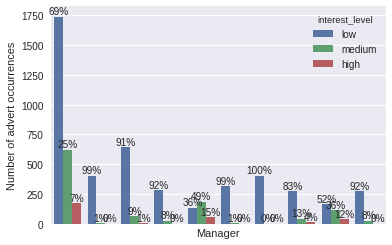

In [36]:
### Let's get a list of top 10 managers
top10managers = train.manager_id.value_counts().nlargest(10).index.tolist()
### ...and plot number of different Interest Level rental adverts for each of them
fig = plt.figure()
ax = sns.countplot(x="manager_id", hue="interest_level",
                   data=train[train.manager_id.isin(top10managers)]);
plt.xlabel('Manager');
plt.ylabel('Number of advert occurrences');
### Manager_ids are too long. Let's remove them
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off');

### Adding percents over bars
height = [0 if np.isnan(p.get_height()) else p.get_height() for p in ax.patches]
ncol = int(len(height)/3)
total = [height[i] + height[i + ncol] + height[i + 2*ncol] for i in range(ncol)] * 3
for i, p in enumerate(ax.patches):    
    ax.text(p.get_x()+p.get_width()/2,
            height[i] + 20,
            '{:1.0%}'.format(height[i]/total[i]),
            ha="center")

In [37]:
train['created'] = pd.to_datetime(train['created'])
train['date'] = train['created'].dt.date
train["year"] = train["created"].dt.year
train['month'] = train['created'].dt.month
train['day'] = train['created'].dt.day
train['hour'] = train['created'].dt.hour
train['weekday'] = train['created'].dt.weekday
train['week'] = train['created'].dt.week
train['quarter'] = train['created'].dt.quarter
train['weekend'] = ((train['weekday'] == 5) & (train['weekday'] == 6))
train['wd'] = ((train['weekday'] != 5) & (train['weekday'] != 6))

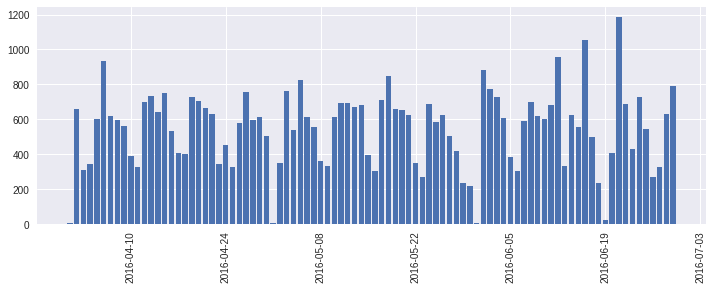

In [38]:
cnt_srs = train['date'].value_counts()

plt.figure(figsize=(12,4))
ax = plt.subplot(111)
ax.bar(cnt_srs.index, cnt_srs.values)
ax.xaxis_date()
plt.xticks(rotation='vertical')
plt.show()

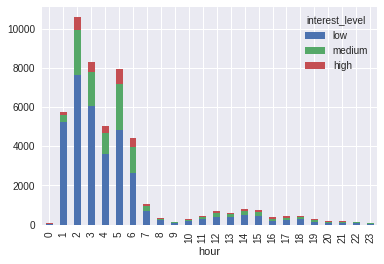

In [39]:
hourDF = train.groupby(['hour', 'interest_level'])['hour'].count().unstack('interest_level').fillna(0)
hourDF[['low','medium',"high"]].plot(kind='bar', stacked=True);

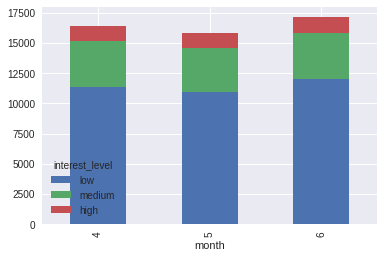

In [40]:
monthDF = train.groupby(['month', 'interest_level'])['month'].count().unstack('interest_level').fillna(0)
monthDF[['low','medium',"high"]].plot(kind='bar', stacked=True);

/home/ly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ly/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


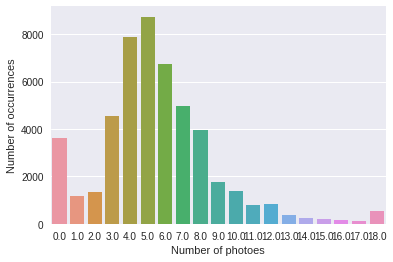

In [41]:
train['num_photos'] = train['photos'].apply(len)
ulimit = np.percentile(train.num_photos.values, 99)
train['num_photos'].ix[train['num_photos']>ulimit] = ulimit

sns.countplot(train.num_photos);
plt.xlabel('Number of photoes');
plt.ylabel('Number of occurrences');

/home/ly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.
/home/ly/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


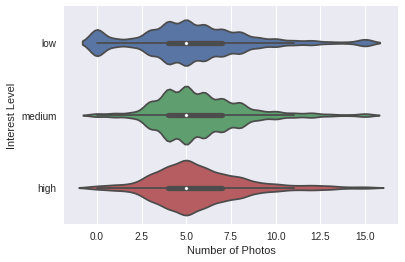

In [42]:
train['num_photos'].ix[train['num_photos']>15] = 15
#sns.stripplot(y="num_photos", x="interest_level",data=train,jitter=True,order=order);

plt.figure()
sns.violinplot(x="num_photos", y="interest_level", data=train, order =['low','medium','high'])
plt.xlabel('Number of Photos')
plt.ylabel('Interest Level')
plt.show()

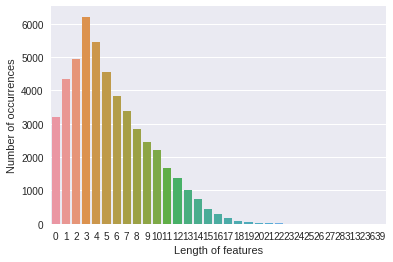

In [43]:
train['len_features'] = train['features'].apply(len)
sns.countplot(train.len_features);
plt.xlabel('Length of features');
plt.ylabel('Number of occurrences');

/home/ly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.
/home/ly/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


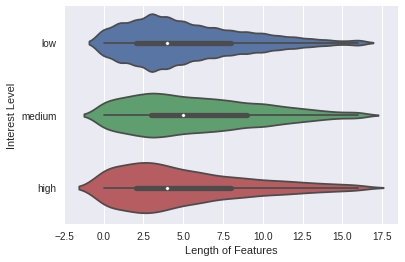

In [44]:
train['len_features'].ix[train['len_features'] > 16] = 16

plt.figure()
sns.violinplot(x="len_features", y="interest_level", data=train, order =['low','medium','high'])
plt.xlabel('Length of Features')
plt.ylabel('Interest Level')
plt.show()

In [45]:
train['num_description_words'] = train['description'].apply(lambda x: len(x.split(' ')))
train['len_description'] = train['description'].apply(len)

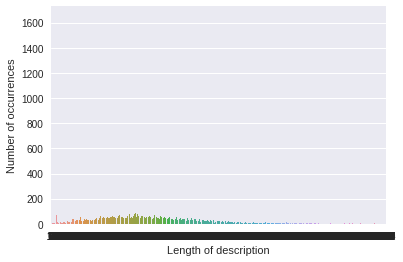

In [46]:
sns.countplot(train.len_description);
plt.xlabel('Length of description');
plt.ylabel('Number of occurrences');

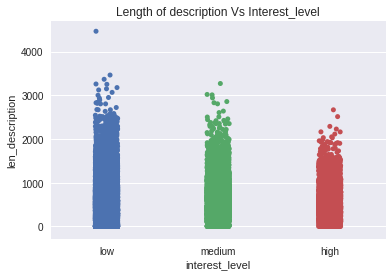

In [47]:
fig = plt.figure()
order = ['low', 'medium', 'high']
#ulimit = np.percentile(train.len_description.values, 99)
#train['len_description'].ix[train['len_description']>ulimit] = ulimit

sns.stripplot(train["interest_level"],train["len_description"],jitter=True,order=order)
plt.title("Length of description Vs Interest_level");

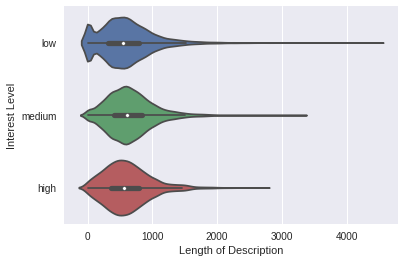

In [48]:
plt.figure()
sns.violinplot(x="len_description", y="interest_level", data=train, order =['low','medium','high'])
plt.xlabel('Length of Description')
plt.ylabel('Interest Level')
plt.show()

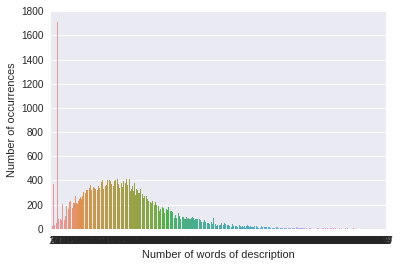

In [49]:
sns.countplot(train.num_description_words);
plt.xlabel('Number of words of description');
plt.ylabel('Number of occurrences');

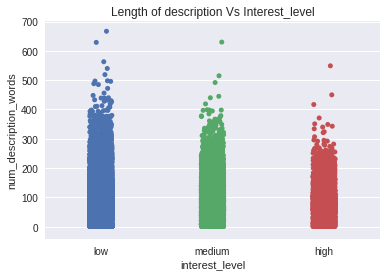

In [50]:
fig = plt.figure()
order = ['low', 'medium', 'high']
#ulimit = np.percentile(train.num_description_words.values, 99)
#ulimit = 500
#train['num_description_words'].ix[train['num_description_words']>ulimit] = ulimit
sns.stripplot(train["interest_level"],train["num_description_words"],jitter=True,order=order)
plt.title("Length of description Vs Interest_level");

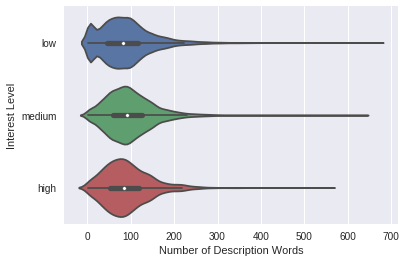

In [51]:
plt.figure()
sns.violinplot(x="num_description_words", y="interest_level", data=train, order =['low','medium','high'])
plt.xlabel('Number of Description Words')
plt.ylabel('Interest Level')
plt.show()

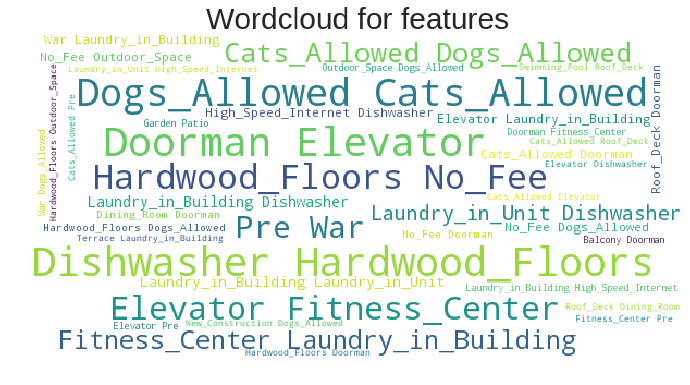

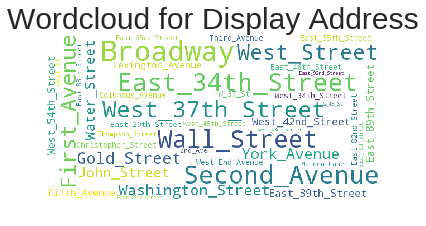

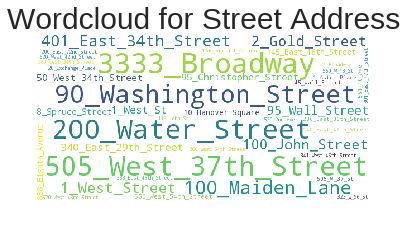

In [53]:
from wordcloud import WordCloud

text = ''
text_da = ''
text_street = ''
#text_desc = ''
for ind, row in train.iterrows():
    for feature in row['features']:
        text = " ".join([text, "_".join(feature.strip().split(" "))])
    text_da = " ".join([text_da,"_".join(row['display_address'].strip().split(" "))])
    text_street = " ".join([text_street,"_".join(row['street_address'].strip().split(" "))])
    #text_desc = " ".join([text_desc, row['description']])
text = text.strip()
text_da = text_da.strip()
text_street = text_street.strip()
#text_desc = text_desc.strip()

plt.figure(figsize=(12,6))
wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=50, max_words=40).generate(text)
wordcloud.recolor(random_state=0)
plt.imshow(wordcloud)
plt.title("Wordcloud for features", fontsize=30)
plt.axis("off")
plt.show()

# wordcloud for display address
plt.figure()
wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=50, max_words=40).generate(text_da)
wordcloud.recolor(random_state=0)
plt.imshow(wordcloud)
plt.title("Wordcloud for Display Address", fontsize=30)
plt.axis("off")
plt.show()

# wordcloud for street address
plt.figure()
wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=50, max_words=40).generate(text_street)
wordcloud.recolor(random_state=0)
plt.imshow(wordcloud)
plt.title("Wordcloud for Street Address", fontsize=30)
plt.axis("off")
plt.show()

In [54]:
contFeatureslist = []
contFeatureslist.append("bathrooms")
contFeatureslist.append("bedrooms")
contFeatureslist.append("price")

print(contFeatureslist)

['bathrooms', 'bedrooms', 'price']


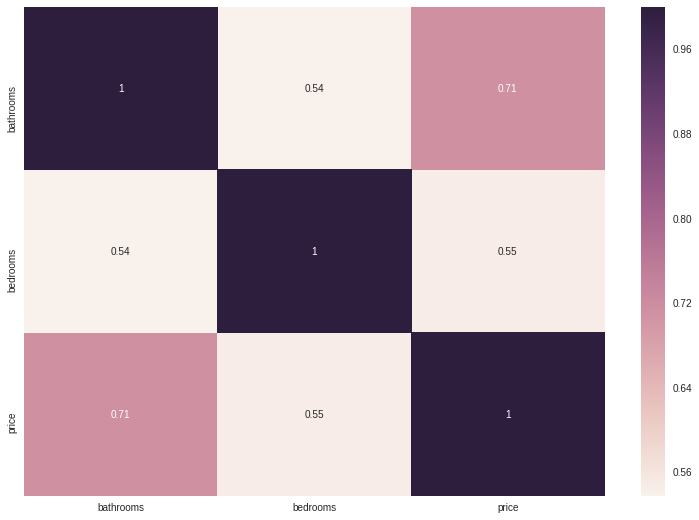

In [55]:
correlationMatrix = train[contFeatureslist].corr().abs()

plt.subplots(figsize=(13, 9))
sns.heatmap(correlationMatrix,annot=True)

# Mask unimportant features
sns.heatmap(correlationMatrix, mask=correlationMatrix < 1, cbar=False)
plt.show()